# Upper Confidence Bound (UCB)

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

## Implementing UCB

In [7]:
import math

# pseudo-code for UCB implementation
# N_i (numbers_of_selections) : number of times i was chosen upto round n (list of size 10 containing all 0s)
# R_i (sums_of_rewards): total reward for i upto round n (list of size 10 containing all 0s)
# N : total number of observations available to us (10,000 in this case)
# d : number of options we have to choose from
# ads_selected : list of ads selected upto round n
# total_reward : sum of rewards received at each round (0 when ad not clicked, 1 when ad clicked)

# for each observation (row)
#   max_UCB = 0
#   ad_chosen = 0
#   for each ad (columns)
#     calculate average reward upto round n
#     calculate delta_i upto round n
#     calculate UCB 
#     max_UCB = max(UCB,max_UCB)
#   increment number_of_selections for chosen ad
#   increment sum_of_rewards for chosen ad
#   increment total_reward
#   append chosen ad to ads_selected

N = 10000
d = 10
ads_selected = []
numbers_of_selections = [0]*d 
sums_of_rewards = [0]*d
total_reward = 0

for n in range(0,N):
  ad_selected = 0
  max_upper_confidence_bound = 0

  for i in range(0,d):
    if(numbers_of_selections[i] > 0):
      average_reward = sums_of_rewards[i] / numbers_of_selections[i]
      delta_i_n = math.sqrt(((3/2) * math.log(n + 1)) / (numbers_of_selections[i]))
      upper_confidence_bound = average_reward + delta_i_n
    else:
      # when ad isn't chosen yet - numbers_of_selections is 0 
      # to pick this add forcibly - we set UCB to a high value
      upper_confidence_bound = 1e400
    if(upper_confidence_bound > max_upper_confidence_bound):
      max_upper_confidence_bound = upper_confidence_bound
      ad_selected = i
  
  ads_selected.append(ad_selected)
  numbers_of_selections[ad_selected] += 1
  sums_of_rewards[ad_selected] += dataset.values[n,ad_selected]
  total_reward += dataset.values[n,ad_selected]





## Visualising the results

Text(0, 0.5, 'No. of clicks')

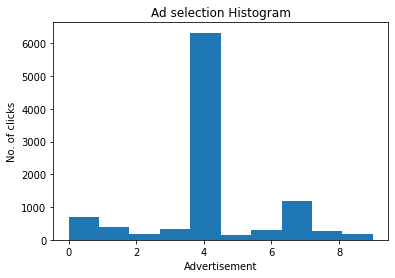

In [8]:
plt.hist(ads_selected)
plt.title('Ad selection Histogram')
plt.xlabel('Advertisement')
plt.ylabel('No. of clicks')
